<a href="https://colab.research.google.com/github/savitra-roy/Porfolio/blob/main/DecisionTree_from_scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt

In [52]:
class Node:
    def __init__(self, feature=None, threshold=None, left=None, right=None,*,value=None):
        self.feature = feature
        self.threshold = threshold
        self.left = left
        self.right = right
        self.value = value

    def is_leaf_node(self):
        return self.value is not None



In [53]:


class DecisionTree:
    def __init__(self, min_samples_split=2, max_depth=100, n_features=None):
        self.min_samples_split=min_samples_split
        self.max_depth=max_depth
        self.n_features=n_features
        self.root=None

    def fit(self, X, y):
        self.n_features = X.shape[1] if not self.n_features else min(X.shape[1],self.n_features)
        self.root = self._grow_tree(X, y)

    def _grow_tree(self, X, y, depth=0):
        n_samples, n_feats = X.shape
        n_labels = len(np.unique(y))

        # check the stopping criteria
        if (depth>=self.max_depth or n_labels==1 or n_samples<self.min_samples_split):
            leaf_value = self._most_common_label(y)
            return Node(value=leaf_value)

        feat_idxs = np.random.choice(n_feats, self.n_features, replace=False)

        # find the best split
        best_feature, best_thresh = self._best_split(X, y, feat_idxs)

        # create child nodes
        left_idxs, right_idxs = self._split(X[:, best_feature], best_thresh)
        left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth+1)
        right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth+1)
        return Node(best_feature, best_thresh, left, right)


    def _best_split(self, X, y, feat_idxs):
        best_gain = -1
        split_idx, split_threshold = None, None

        for feat_idx in feat_idxs:
            X_column = X[:, feat_idx]
            thresholds = np.unique(X_column)

            for thr in thresholds:
                # calculate the information gain
                gain = self._information_gain(y, X_column, thr)

                if gain > best_gain:
                    best_gain = gain
                    split_idx = feat_idx
                    split_threshold = thr

        return split_idx, split_threshold


    def _information_gain(self, y, X_column, threshold):
        # parent entropy
        parent_entropy = self._entropy(y)

        # create children
        left_idxs, right_idxs = self._split(X_column, threshold)

        if len(left_idxs) == 0 or len(right_idxs) == 0:
            return 0

        # calculate the weighted avg. entropy of children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        e_l, e_r = self._entropy(y[left_idxs]), self._entropy(y[right_idxs])
        child_entropy = (n_l/n) * e_l + (n_r/n) * e_r

        # calculate the IG
        information_gain = parent_entropy - child_entropy
        return information_gain

    def _split(self, X_column, split_thresh):
        left_idxs = np.argwhere(X_column <= split_thresh).flatten()
        right_idxs = np.argwhere(X_column > split_thresh).flatten()
        return left_idxs, right_idxs

    def _entropy(self, y):
        hist = np.bincount(y)
        ps = hist / len(y)
        return -np.sum([p * np.log(p) for p in ps if p>0])


    def _most_common_label(self, y):
        counter = Counter(y)
        value = counter.most_common(1)[0][0]
        return value

    def predict(self, X):
        return np.array([self._traverse_tree(x, self.root) for x in X])

    def _traverse_tree(self, x, node):
        if node.is_leaf_node():
            return node.value

        if x[node.feature] <= node.threshold:
            return self._traverse_tree(x, node.left)
        return self._traverse_tree(x, node.right)


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [55]:
columns= data['feature_names']
X= data['data']
y =data['target']

In [56]:
from sklearn.metrics import accuracy_score
X.shape

(569, 30)

In [57]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42)

In [58]:
X_train

array([[9.029e+00, 1.733e+01, 5.879e+01, ..., 1.750e-01, 4.228e-01,
        1.175e-01],
       [2.109e+01, 2.657e+01, 1.427e+02, ..., 2.903e-01, 4.098e-01,
        1.284e-01],
       [9.173e+00, 1.386e+01, 5.920e+01, ..., 5.087e-02, 3.282e-01,
        8.490e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [59]:
dt = DecisionTree(max_depth=10)
dt.fit(X_train, y_train)
predictions = dt.predict(X_test)

In [63]:
acc= accuracy_score(y_test,predictions)
acc
acc_list= []

In [64]:
for max_depth in range(1,30):
  dt= DecisionTree(max_depth= max_depth)
  dt.fit(X_train,y_train)
  predictions= dt.predict(X_test)
  acc=accuracy_score(y_test,predictions)
  acc_list.append(acc)
  print(f'depth = {max_depth},accuracy= {acc} ')

depth = 1,accuracy= 0.8859649122807017 
depth = 2,accuracy= 0.9035087719298246 
depth = 3,accuracy= 0.9473684210526315 
depth = 4,accuracy= 0.9473684210526315 
depth = 5,accuracy= 0.9473684210526315 
depth = 6,accuracy= 0.9385964912280702 
depth = 7,accuracy= 0.9385964912280702 
depth = 8,accuracy= 0.9473684210526315 
depth = 9,accuracy= 0.9385964912280702 
depth = 10,accuracy= 0.9298245614035088 
depth = 11,accuracy= 0.9385964912280702 
depth = 12,accuracy= 0.9385964912280702 
depth = 13,accuracy= 0.9385964912280702 
depth = 14,accuracy= 0.9385964912280702 
depth = 15,accuracy= 0.9385964912280702 
depth = 16,accuracy= 0.9473684210526315 
depth = 17,accuracy= 0.9385964912280702 
depth = 18,accuracy= 0.9385964912280702 
depth = 19,accuracy= 0.9473684210526315 
depth = 20,accuracy= 0.9473684210526315 
depth = 21,accuracy= 0.9385964912280702 
depth = 22,accuracy= 0.9385964912280702 
depth = 23,accuracy= 0.9298245614035088 
depth = 24,accuracy= 0.9210526315789473 
depth = 25,accuracy= 0.92

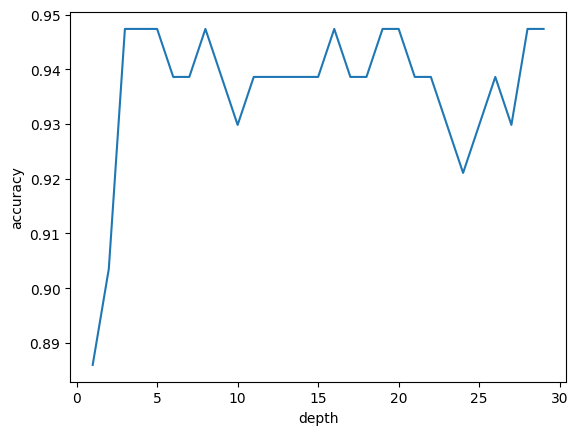

In [66]:
plt.plot(range(1,30),acc_list)
plt.xlabel('depth')
plt.ylabel('accuracy')
plt.show()